# Escapes de prisión en helicóptero

## Resumen: 
    En el presente proyecto serán respondidas las siguientes preguntas:
        1. ¿En qué año ocurrieron la mayoría de los intentos de escape de prisión en helicóptero?
        2. ¿En qué países ocurren la mayoría de los intentos de escape de prisión en helicóptero?
        3. ¿En qué países tienen los intentos de escape de prisión en helicóptero una mayor probabilidad de éxito?
        4. ¿Cómo afecta el número de fugitivos al éxito del escape?
        5. ¿Cuáles fugitivos lo han hecho más de una vez?

Empezamos importando algunos métodos de la librería helper, las cuales nos ayudarán a modelar los datos de una manera más simple.

In [1]:
from helper import *

Importamos la librería pandas, de la cual usaremos métodos puntuales para la presentación de la data y el modelamiento de datos. Este paso no es necesario, debido a que la librería helper posee ya la librería pandas (Ver archivo); sin embargo, para efectos didácticos, se importará de todas maneras.

In [2]:
import pandas as pd

Importamos la sub-librería pyplot, de Matplotlib ya que no necesitaremos configurar completamente el gráfico. Esta sub-librería nos permitirá generar gráficos rápidos para un análisis de datos ágil. Este paso no es necesario, debido a que la librería helper posee ya la sub-librería pyplot (Ver archivo); sin embargo, para efectos didácticos, se importará de todas maneras.

In [3]:
import matplotlib.pyplot as plt

## Consiguiendo la data

Ahora consigamos la data de la lista de los escapes de prisión en helicóptero en el artículo de Wikipedia. (https://en.wikipedia.org/wiki/List_of_helicopter_prison_escapes)

In [4]:
url = 'https://en.wikipedia.org/wiki/List_of_helicopter_prison_escapes'
data = data_from_url(url)

Revisamos las primeras filas de tabla con la función display_no_index(), incluida en la librería helper. Este paso se puede omitir ya que es solo para dar una idea visual de la tabla, de lo contrario se puede revisar directamente desde el enlace de donde se obtuvo la data.

In [5]:
df1 = pd.DataFrame(data[:2], columns = ['Date', 'Prision Name', 'Country', 'Succeeded', 'Escapee(s)', 'Details'])
display_no_index(df1)

Date,Prision Name,Country,Succeeded,Escapee(s),Details
"August 19, 1971",Santa Martha Acatitla,Mexico,Yes,Joel David Kaplan Carlos Antonio Contreras Castro,"Joel David Kaplan was a New York businessman who had been arrested for murder in 1962 in Mexico City and was incarcerated at the Santa Martha Acatitla prison in the Iztapalapa borough of Mexico City. Joel's sister, Judy Kaplan, arranged the means to help Kaplan escape, and on August 19, 1971, a helicopter landed in the prison yard. The guards mistakenly thought this was an official visit. In two minutes, Kaplan and his cellmate Carlos Antonio Contreras, a Venezuelan counterfeiter, were able to board the craft and were piloted away, before any shots were fired.[9] Both men were flown to Texas and then different planes flew Kaplan to California and Contreras to Guatemala.[3] The Mexican government never initiated extradition proceedings against Kaplan.[9] The escape is told in a book, The 10-Second Jailbreak: The Helicopter Escape of Joel David Kaplan.[4] It also inspired the 1975 action movie Breakout, which starred Charles Bronson and Robert Duvall.[9]"
"October 31, 1973",Mountjoy Jail,Ireland,Yes,JB O'Hagan Seamus TwomeyKevin Mallon,"On October 31, 1973, an IRA member hijacked a helicopter and forced the pilot to land in the exercise yard of Dublin's Mountjoy Jail's D Wing at 3:40 p.m., October 31, 1973. Three members of the IRA were able to escape: JB O'Hagan, Seamus Twomey and Kevin Mallon. Another prisoner who also was in the prison was quoted as saying, ""One shamefaced screw apologised to the governor and said he thought it was the new Minister for Defence (Paddy Donegan) arriving. I told him it was our Minister of Defence leaving."" The Mountjoy helicopter escape became Republican lore and was immortalized by ""The Helicopter Song"", which contains the lines ""It's up like a bird and over the city. There's three men a'missing I heard the warder say"".[1]"


## Limpiando la data

### Eliminando la columna detalles:
Debido a que no necesitaremos detalles específicos de los escapes, eliminaremos la columna 'Details'.

In [6]:
index = 0
for row in data[:3]:
    data[index] = row[:-1]
    index += 1
    
df1a = pd.DataFrame(data[:2], columns = ['Date', 'Prision Name', 'Country', 'Succeeded', 'Escapee(s)'])
display_no_index(df1a)

Date,Prision Name,Country,Succeeded,Escapee(s)
"August 19, 1971",Santa Martha Acatitla,Mexico,Yes,Joel David Kaplan Carlos Antonio Contreras Castro
"October 31, 1973",Mountjoy Jail,Ireland,Yes,JB O'Hagan Seamus TwomeyKevin Mallon


## Resolviendo la pregunta 1.

### Extrayendo el año de la fecha:
En este caso, solo necesitaremos hacer el análisis por año, el cual extraeremos utilizando la función fetch_year().

In [7]:
for row in data:
    row[0] = fetch_year(row[0])

### Generando una lista de años desde el primer escape registrado hasta el último:
En este paso utilizaremos las funciones min y max, orientadas a la primera columna de la tabla 'data' y crearemos la lista 'attempts_per_year', la cual almacenará los años desde el primer incidente hasta el último y contará las veces en las que hubo incidentes por año.

In [8]:
min_year = min(data, key=lambda x: x[0])[0]
max_year = max(data, key=lambda x: x[0])[0]
attempts_per_year = []
for year in range(min_year, max_year + 1):
    attempts_per_year.append([year,0])

### Modificando el contador de la lista 'attempts_per_year':
Se modifica el segundo elemento de la lista 'attempts_per_year', el cual contará las veces que se registre un incidente en un año en particular. Para validar la tabla, la imprimimos con el método Dataframe().

In [9]:
for row in data:
    for year_attempt in attempts_per_year:
        if row[0] == year_attempt[0]:
            year_attempt[1] += 1
df2 = pd.DataFrame(attempts_per_year, columns = ['Year', 'Attempts'])
display_no_index(df2[:3])

Year,Attempts
1971,1
1972,0
1973,1


### Presentación gráfica:
Se ejecuta el método barplot() para dar una interfaz gráfica a la lista 'attempts_per_year'.

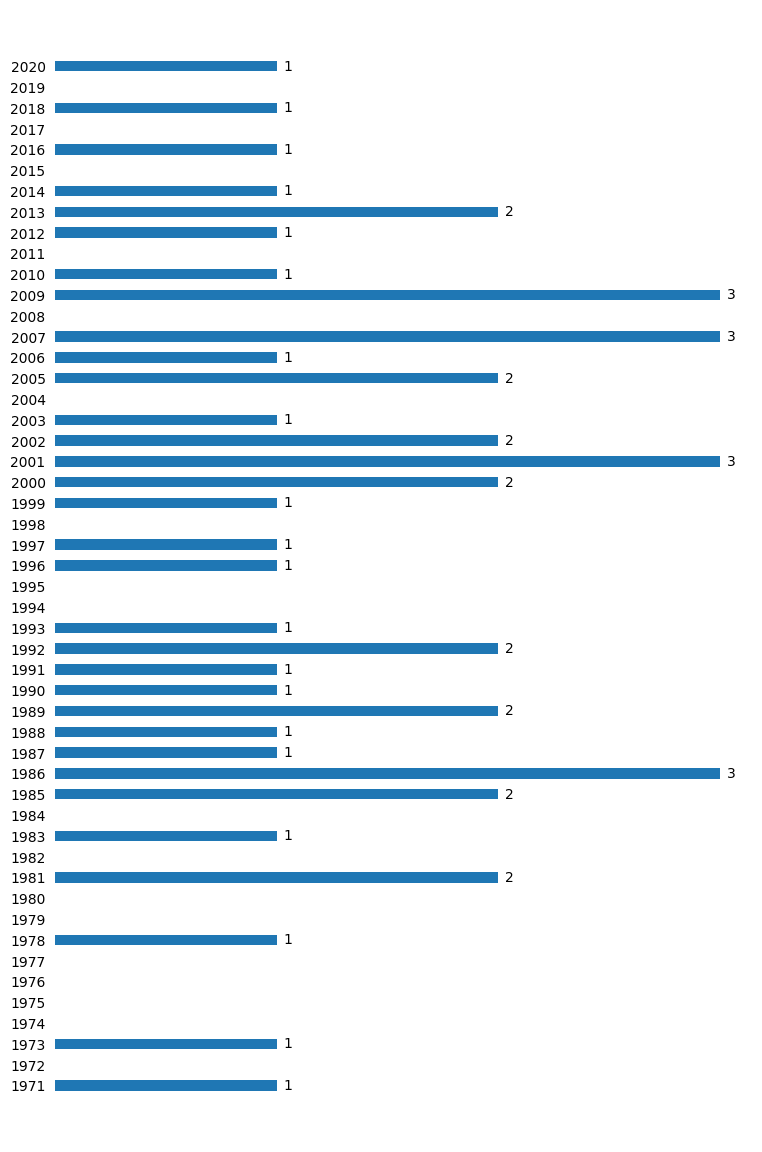

In [10]:
%matplotlib inline
barplot(attempts_per_year)

### Conclusión 1:
Los años con mayor incidencia de escapes de prisión fueron los años 1986, 2001,2007 y 2009 con 3 incidencias cada uno.

## Resolviendo la pregunta 2.

### Una manera alternativa de trabajar los datos (DataFrame):
En este caso trabajaremos los datos en forma de DataFrame, objeto que nos permite modelar los datos de manera más eficiente. La primera fila de código nos permite obtener los datos de la segunda lista del url señalado. La segunda fila de código nos permite filtrar la data que necesitamos en función al nombre de los encabezados; esta manera de filtrar los datos es propia de los objetos DataFrame. Notemos que este DataFrame ya está definido en la librería helper; sin embargo, se muestra aquí por un tema didáctico.

In [11]:
df = pd.read_html("https://en.wikipedia.org/wiki/List_of_helicopter_prison_escapes")[1]
df = df[["Date", "Prison name", "Country", "Succeeded", "Escapee(s)"]]
display_no_index(df[:3])

Date,Prison name,Country,Succeeded,Escapee(s)
"August 19, 1971",Santa Martha Acatitla,Mexico,Yes,Joel David Kaplan Carlos Antonio Contreras Castro
"October 31, 1973",Mountjoy Jail,Ireland,Yes,JB O'Hagan Seamus TwomeyKevin Mallon
"May 24, 1978","United States Penitentiary, Marion",United States,No,Garrett Brock TrapnellMartin Joseph McNallyJames Kenneth Johnson


### Presentación en tabla:
Se definen dos variables, la primera será encargada de señalar los países, y la segunda será el contador de ocurrencias, sean o no exitosas.

In [12]:
countries = df.Country.value_counts().index
occurrences = df.Country.value_counts().values
d = {"Country": countries, "Number of Occurrences": occurrences}
display_no_index(pd.DataFrame(d))

Country,Number of Occurrences
France,15
United States,8
Greece,4
Canada,4
Belgium,4
Brazil,2
United Kingdom,2
Australia,2
Russia,1
Italy,1


### Conclusión 2:
    El top 3 de países con mayor número de ocurrencias de escapes en helicóptero son:
        1. Francia, con 15 ocurrencias.
        2. Estados unidos, con 8 ocurrencias.
        3. Grecia, Bélgica y Canadá, con 4 ocurrencias.

## Resolviendo la pregunta 3.

### Creamos el DataFrame:
Debido a que es más fácil trabajar con DataFrames, usaremos el DataFrame 'attempt', generado a partir de la función pd.crosstab(), tomando como atributos las columnas 'Country' y 'Succeeded' del DataFrame 'df, definido líneas arriba.

In [13]:
attempt=pd.crosstab(df.Country,df.Succeeded)
display(attempt)

Succeeded,No,Yes
Country,,
Australia,1,1
Belgium,2,2
Brazil,0,2
Canada,1,3
Chile,0,1
France,4,11
Greece,2,2
Ireland,0,1
Italy,0,1


### Transformando DataFrame a Lista:
    Para modelar los datos, necesitamos trabajar con listas, por lo que transformaremos nuestro DataFrame con los siguientes pasos:
        1. Definimos una lista vacía, la cual contendrá nuestro DataFrame transformado.
        2. Recorreremos el DataFrame 'attempt' a través de dos variables; index, la cual refiere al país y row, la cual refiere al número de veces que se logró, o no, escapar de la prisión de ese país en particular.
        3. Asignamos la cadena 'index' a la variable tipo lista 'a'.
        4. Extendemos la lista a con el método .extend() y usamos como argumento los valores de row, transformados a una lista con el método list().
        5. Finalmente, añadimos la lista 'a', la cual se reemplaza en cada iteración, a la lisa 'list1'.

In [14]:
list1 = []

for index, row in attempt.iterrows():
    a = [index]
    a.extend(list(row.values))
    list1.append(a)
    
print(list1)

[['Australia', 1, 1], ['Belgium', 2, 2], ['Brazil', 0, 2], ['Canada', 1, 3], ['Chile', 0, 1], ['France', 4, 11], ['Greece', 2, 2], ['Ireland', 0, 1], ['Italy', 0, 1], ['Mexico', 0, 1], ['Netherlands', 1, 0], ['Puerto Rico', 0, 1], ['Russia', 0, 1], ['United Kingdom', 1, 1], ['United States', 2, 6]]


### Calculando la probabilidad relativa:
Para calcular la probabilidad relativa, se utilizará la fórmula siguiente: "Tasa de éxito relativa del país X = (Número de éxitos del país X / Número total de intentos del país X) * C", donde "C = 1 / max(Número total de intentos en cualquier país)". Para efectos más visuales, escogeremos algun país que tenga como máximo 2 intentos.

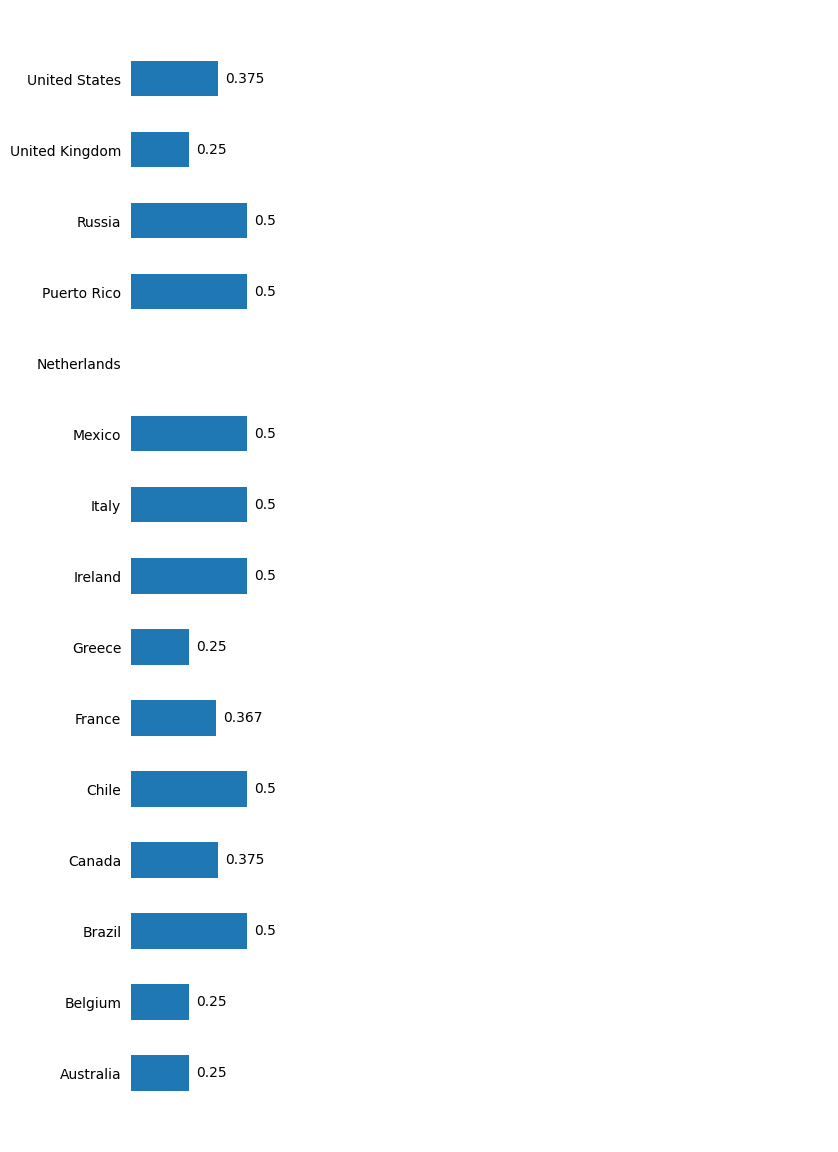

In [15]:
sum1 = []
relative = []
c = 1/2

for i in list1:
    r = i[1] + i[2]
    sum1.append(r)

for i in range(len(list1)):
    div = list1[i][2]/int(sum1[i])
    relative.append([list1[i][0],round(div*c,3)])
    
barplot(relative)

### Conclusión 3:
Tenemos un empate entre los países: Rusia, Puerto Rico, México, Italia, Irlanda, Chile y Brazil; en los cuales la probabilidad de éxito relativa es de 0.5.

## Resolviendo la pregunta 4.

### Agradeceré su apoyo en esta pregunta ya que no pude ejecutarla en código.

## Resolviendo la pregunta 5.

### Trabajando con listas:
Debido a que existen nombres pegados en la columna 'Escapee(s)' cuando hay más de un criminal que intentó escaparse, se transformará la columna en una lista, luego se separará con la regla r'(?<=[a-z])(?=[A-Z])', la cual separa las cadenas cuando encuentra una cadena con una letra minúscula y una letra mayúscula juntas. Luego se asignarán los nuevos elementos a una nueva lista 'new_list' y se eliminarán las filas que no tengan datos, representadas por '-', a través de la función 'filter'. 

In [16]:
col = df['Escapee(s)'].to_list()
new_list = []
for item in col:
    new_item = re.split(r'(?<=[a-z])(?=[A-Z])', item)
    new_list += new_item
new_list = list(filter(lambda x: x != '—', new_list))

### Imprimiendo resultados:
Convertimos 'new_list' a un diccionario para nombrar la columna, de la tabla a imprimir, como 'Times'. Luego lo convertimos en un DataFrame para utilizar el método '.value_counts()' para contar las repeticiones en una variable llamada 'count'. Finalmente, por tema estético, ejecutamos la función 'display', transformando la variable count en un DataFrame para que se pueda imprimir.

In [17]:
dat1 = {'Times': new_list}
df3 = pd.DataFrame(dat1)
count = df3['Times'].value_counts()
display(pd.DataFrame(count))

,Times
Michel Vaujour,2
Pascal Payet,2
Pola Roupa,1
Ben Kramer,1
Serge Pomerleau,1
...,...
James Kenneth Johnson,1
William Douglas Ballew,1
David Mc,1
Sydney Draper,1


### Conclusión 5:

Las personas que intentaron escapar más de una vez fueron Pascal Payet y Micheal Vaujour, los cuales intentaron escapar dos veces.

### Observación:

Vasilis Paleokostas también intentó escapar más de una vez, sin embargo, en la data figura con dos nombres diferentes, 'Vasilis' Paleokostas y 'Vassilis' Paleokostas, por lo que el código no pudo resaltar su participación también.